#**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

Se realiza un análisis exploratorio de los datos de la letalidad de siniestros viales en CABA con datos proporcionados por el gobierno. El mismo se realiza con la finalidad de encontrar patrones que permitan conocer sus causas y generar información para la toma de decisiones en relación a disminuir las víctimas fatales.

Para ello se cuenta con datasets con datos de los siniestros (tabla de HECHOS) y de las víctimas (tabla de VICTIMAS) la cual contiene datos importantes sin llegar a invadir la privacidad de las personas involucradas.


Librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import dateutil.parser
import matplotlib.pyplot as plt
import seaborn as sns

## Tabla 'HECHOS' del excel Homicidios.

In [ ]:
hechos_homicidios = pd.read_excel('./datos/homicidios.xlsx', sheet_name='HECHOS')

In [ ]:
hechos_homicidios.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


## Observación general del conjunto de datos.
El conjunto de datos cuenta con 21 columnas y 696 hechos.

In [ ]:
# Columnas del dataset
hechos_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [ ]:
# Cantidad de registros
hechos_homicidios.shape[0]

696

Se normaliza el nombre de columnas; debido a que algunas columnas se presentan en mayúsculas y otras en minúsculas, se decide trabajar con la totalidad del nombre de las columnas en mayúsculas, y las separaciones por medio de guion bajo (_).

In [ ]:
# Nombres en mayúsculas.
hechos_homicidios.columns = [x.upper() for x in hechos_homicidios.columns]
# Reemplazo de espacios por guion bajo.
hechos_homicidios.columns = hechos_homicidios.columns.str.replace(' ','_')

Se renombran algunas columnas.

In [ ]:
hechos_homicidios = hechos_homicidios.rename(columns = {'N_VICTIMAS': 'NUMERO_VICTIMAS',
                                                        'AAAA':'AÑO',
                                                        'MM':'MES',
                                                        'DD':'DIA',
                                                        'HORA': 'HORA_COMPLETA',
                                                        'HH':'HORA'})

## Datos duplicados
No se encontraron valores duplicados.

In [ ]:
duplicados = hechos_homicidios['ID'].duplicated()
print(hechos_homicidios[duplicados])

Empty DataFrame
Columns: [ID, NUMERO_VICTIMAS, FECHA, AÑO, MES, DIA, HORA_COMPLETA, HORA, LUGAR_DEL_HECHO, TIPO_DE_CALLE, CALLE, ALTURA, CRUCE, DIRECCIÓN_NORMALIZADA, COMUNA, XY_(CABA), POS_X, POS_Y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]


## Valores faltantes

El conjunto de datos presenta 747 valores faltantes, los cuales se distribuyen de la siguiente forma:

*   CALLE: 1 valor faltante.
*   ALTURA: 567 valores faltantes.
*   CRUCE: 171 valores faltantes.
*   DIRECCIÓN_NORMALIZADA: 8 valores faltantes.

Los cuales en conjunto representan el 5.1% de todos los datos.

In [ ]:
hechos_homicidios.isnull().sum()

ID                         0
NUMERO_VICTIMAS            0
FECHA                      0
AÑO                        0
MES                        0
DIA                        0
HORA_COMPLETA              0
HORA                       0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
CALLE                      1
ALTURA                   567
CRUCE                    171
DIRECCIÓN_NORMALIZADA      8
COMUNA                     0
XY_(CABA)                  0
POS_X                      0
POS_Y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

La columna DIRECCIÓN_NORMALIZADA contiene solo 8 datos nulos y representa el 1.1% de los datos de la columna. No se tiene información para completar con datos concretos los datos faltantes, pero no considero conveniente eliminar los hechos.
Se imputaran los nulos como 'SIN DATO'.

In [ ]:
# Reemplazo nulos por SIN DATO
hechos_homicidios['DIRECCIÓN_NORMALIZADA'].fillna('SIN DATO', inplace=True)
# Se verifican los datos imputados
hechos_homicidios[hechos_homicidios['DIRECCIÓN_NORMALIZADA'] == 'SIN DATO'][['DIRECCIÓN_NORMALIZADA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE']]

,DIRECCIÓN_NORMALIZADA,LUGAR_DEL_HECHO,TIPO_DE_CALLE
38,SIN DATO,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,SIN DATO,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,SIN DATO,SD,CALLE
180,SIN DATO,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,SIN DATO,AU DELLEPIANE 2400,AUTOPISTA
313,SIN DATO,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,SIN DATO,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,SIN DATO,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


La columna ALTURA presenta la particularidad de 81.5% datos ausentes, esto ocurre porque este dato se completa cuando el hecho ocurre en algún punto de la calle y la mayoría de los hechos registrados ocurrieron en esquinas. De igual manera, debido a esto y que hay muy pocos valores para trabajar, se considera que no es un dato relevante para el análisis y se decide eliminar la columna

In [ ]:
nulos = hechos_homicidios['ALTURA'].isnull().sum()
print(nulos / len(hechos_homicidios))

0.8146551724137931


In [ ]:
hechos_homicidios = hechos_homicidios.drop('ALTURA', axis = 1)

La columna CRUCE contiene 24.6% de valores faltantes y al contrario de la columna anterior, esta no tiene dato cuando se trata de un hecho ocurrido en un cruce. Se decide modificar esta columna con un valor 'TRUE' para los casos que son hechos en cruces de calles y 'FALSE' en el caso que no sea un cruce de calles.

In [ ]:
# Reemplazo los valores nulos por "TRUE" y los no nulos por "FALSE".
hechos_homicidios['CRUCE'] = np.where(hechos_homicidios['CRUCE'].isnull(), 'FALSE', 'TRUE')

# Se revia la columna
hechos_homicidios[['CRUCE', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE']]

,CRUCE,LUGAR_DEL_HECHO,TIPO_DE_CALLE
0,TRUE,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,TRUE,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,FALSE,AV ENTRE RIOS 2034,AVENIDA
3,TRUE,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,TRUE,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
...,...,...,...
691,TRUE,AV. RIESTRA Y MOM,AVENIDA
692,TRUE,AU DELLEPIANE Y LACARRA,AUTOPISTA
693,TRUE,AV. GAONA Y TERRADA,AVENIDA
694,FALSE,AV. EVA PERON 4071,AVENIDA


## Variables geográficas
Las columnas 'XY_(CABA)', 'POS_X' y 'POS_Y' presentan valores faltantes de información geográfica

In [ ]:
hechos_homicidios[hechos_homicidios['XY_(CABA)'] =='Point (. .)']

,ID,NUMERO_VICTIMAS,FECHA,AÑO,MES,DIA,HORA_COMPLETA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCIÓN_NORMALIZADA,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,FALSE,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",FALSE,SIN DATO,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,FALSE,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,FALSE,SIN DATO,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,FALSE,SIN DATO,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,FALSE,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",FALSE,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,FALSE,SIN DATO,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,FALSE,SIN DATO,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,FALSE,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


Se imputarán los valores a 0 de estos registros que no presentan coordenadas ya que no hay información que permita completar estos datos.


In [ ]:
hechos_homicidios['POS_X'] = hechos_homicidios['POS_X'].replace('.', 0)
hechos_homicidios['POS_Y'] = hechos_homicidios['POS_Y'].replace('.', 0)
hechos_homicidios['XY_(CABA)'] = hechos_homicidios['XY_(CABA)'].replace('Point (. .)', 0)

In [ ]:
hechos_homicidios[hechos_homicidios['ID']=='2017-0140']

,ID,NUMERO_VICTIMAS,FECHA,AÑO,MES,DIA,HORA_COMPLETA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCIÓN_NORMALIZADA,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,FALSE,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,0,0,0,MOTO-PASAJEROS,MOTO,PASAJEROS


## Tipos de datos

In [ ]:
# Verificamos el tipo de dato de 'HORA_COMPLETA'
hechos_homicidios['HORA_COMPLETA'].apply(type).value_counts()

<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: HORA_COMPLETA, dtype: int64

In [ ]:
def convertir_hora(hora):
    if isinstance(hora, str):
        try:
            return datetime.datetime.strptime(hora, "%H:%M:%S").time()
        except ValueError:
            return None
    elif isinstance(hora, datetime.datetime):
        return hora.time()
    return hora

hechos_homicidios['HORA_COMPLETA'] = hechos_homicidios['HORA_COMPLETA'].apply(convertir_hora)

In [ ]:
hechos_homicidios['HORA_COMPLETA'].apply(type).value_counts()

<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: HORA_COMPLETA, dtype: int64

In [ ]:
hechos_homicidios[hechos_homicidios['HORA_COMPLETA'].isna()]

,ID,NUMERO_VICTIMAS,FECHA,AÑO,MES,DIA,HORA_COMPLETA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCIÓN_NORMALIZADA,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",TRUE,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Para imputar los datos faltantes utilizare la moda para la hora mas común.

In [ ]:
# Calculamos la hora mas común
moda = hechos_homicidios['HORA_COMPLETA'].mode().iloc[0]
print('Hora mas común: ', moda)

# Se reemplaza el valor faltante por la hora más común en la columna 'HORA_COMPLETA'
hechos_homicidios['HORA_COMPLETA'].fillna(moda, inplace=True)

# Verificamos el tipo de dato
hechos_homicidios['HORA_COMPLETA'].apply(type).value_counts()

Hora mas común:  09:00:00


<class 'datetime.time'>    696
Name: HORA_COMPLETA, dtype: int64

En la columna 'HORA' se presenta el dato 'SD', verificamos e imputamos la hora mas común en este dato.

In [ ]:
# Se verifica el tipo de dato
hechos_homicidios['HORA'].apply(type).value_counts()

<class 'int'>    695
<class 'str'>      1
Name: HORA, dtype: int64

In [ ]:
# Reemplazamos el valor 'SD' por la hora mas común
hechos_homicidios.HORA.replace({'SD': 9}, inplace=True)

In [ ]:
# Se verifica el tipo de dato
hechos_homicidios['HORA'].apply(type).value_counts()

<class 'int'>    696
Name: HORA, dtype: int64

In [ ]:
hechos_homicidios.columns

Index(['ID', 'NUMERO_VICTIMAS', 'FECHA', 'AÑO', 'MES', 'DIA', 'HORA_COMPLETA',
       'HORA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'CALLE', 'CRUCE',
       'DIRECCIÓN_NORMALIZADA', 'COMUNA', 'XY_(CABA)', 'POS_X', 'POS_Y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [ ]:
# Imprimir el tipo de datos de cada columna
print(hechos_homicidios.dtypes)

ID                               object
NUMERO_VICTIMAS                   int64
FECHA                    datetime64[ns]
AÑO                               int64
MES                               int64
DIA                               int64
HORA_COMPLETA                    object
HORA                              int64
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
CALLE                            object
CRUCE                            object
DIRECCIÓN_NORMALIZADA            object
COMUNA                            int64
XY_(CABA)                        object
POS_X                            object
POS_Y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object


## Tabla 'VICTIMAS' del excel Homicidios.

In [ ]:
hechos_victimas = pd.read_excel('./datos/homicidios.xlsx', sheet_name='VICTIMAS')
hechos_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


## Observación general del conjunto de datos.
El conjunto de datos cuenta con 10 columnas y 717 hechos.



In [ ]:
# Columnas del dataset
hechos_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [ ]:
# Cantidad de registros
hechos_victimas.shape[0]

717

Se renombran algunas columnas y no es necesario normalizar el nombre de las columnas ya que tienen el formato que venimos trabajando.

In [ ]:
hechos_victimas = hechos_victimas.rename(columns = {'ID_hecho': 'ID',
                                                        'AAAA':'AÑO',
                                                        'MM':'MES',
                                                        'DD':'DIA',})

## Datos duplicados
Verificamos si hay valores duplicados.

In [ ]:
hechos_victimas[hechos_victimas.duplicated()]

,ID,FECHA,AÑO,MES,DIA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


No se encontraron valores duplicados. A continuación se observan ID repetidos pero se refieren a distintas victimas del mismo hecho por lo tanto conservaremos las mismas.

In [ ]:
# Se filtran los ID duplicados
duplicados = hechos_victimas[hechos_victimas.duplicated(subset='ID', keep=False)]
# se ordenan las filas duplicadas para comparar entre sí
duplicados_ordenados = duplicados.sort_values(by='ID')

In [ ]:
duplicados_ordenados

,ID,FECHA,AÑO,MES,DIA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00


## Valores faltantes

No se han encontrados datos nulos.

In [ ]:
hechos_victimas.isnull().sum()

ID                     0
FECHA                  0
AÑO                    0
MES                    0
DIA                    0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

## Tipos de datos

In [ ]:
# Imprimir el tipo de datos de cada columna
hechos_victimas.dtypes

ID                             object
FECHA                  datetime64[ns]
AÑO                             int64
MES                             int64
DIA                             int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                           object
FECHA_FALLECIMIENTO            object
dtype: object

Se observa que la columna 'EDAD' presenta el tipo de dato string y a consideración debería ser tipo int. También se observa que la columna 'FECHA_FALLECIMIENTO' no tiene formato datetime.

In [ ]:
# Cantidad de valores por tipo de dato en la columna 'edad'
tipos_datos = hechos_victimas['EDAD'].apply(type).value_counts()
print(tipos_datos)

<class 'int'>    664
<class 'str'>     53
Name: EDAD, dtype: int64


Podemos observar 53 datos registrados de tipo str en la columna 'EDAD'

In [ ]:
hechos_victimas[hechos_victimas['EDAD'].apply(lambda x: isinstance(x, str))]

,ID,FECHA,AÑO,MES,DIA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


Para rellenar los datos faltantes utilizaré el promedio de las edades de las victimas. Para lograr esto, tomaremos en cuenta el sexo.

Como la columna 'SEXO' también presenta datos faltantes, imputaremos esos datos con el valor mas frecuente entre MASCULINO y FEMENINO.

In [ ]:
# Primero se reemplaza 'SD' con NaN en la columna 'SEXO'
hechos_victimas['SEXO'] = hechos_victimas['SEXO'].replace('SD', pd.NA)

# Luego se calcula el valor mas frecuente en la columna 'SEXO'
valor_frecuente = hechos_victimas['SEXO'].mode().iloc[0]
print('El valor mas frecuente es:', valor_frecuente)

# Se imputan los valores NaN con el valor mas frecuente
hechos_victimas['SEXO'].fillna(valor_frecuente, inplace=True)

El valor mas frecuente es: MASCULINO


Ahora con la columna 'SEXO' lista, procederemos a imputar la columna 'EDAD'

In [ ]:
# Primero se reemplaza "SD" con NaN en la columna 'EDAD'
hechos_victimas['EDAD'] = hechos_victimas['EDAD'].replace('SD', pd.NA)

# Luego se calcula el promedio de edad para cada género
promedio_genero = hechos_victimas.groupby('SEXO')['EDAD'].mean()

In [ ]:
print(f'La edad promedio de MASCULINO es: {round(promedio_genero["MASCULINO"])}\nLa edad promedio de FEMENINO es: {round(promedio_genero["FEMENINO"])}')

La edad promedio de MASCULINO es: 40
La edad promedio de FEMENINO es: 51


In [ ]:
# Se imputan los valores NaN con el promedio en la columna según cada género en la columna 'EDAD'
hechos_victimas['EDAD'] = hechos_victimas.apply(lambda fila: promedio_genero[fila['SEXO']] if pd.isna(fila['EDAD']) else fila['EDAD'], axis=1)

# Convierte la fila a int
hechos_victimas['EDAD'] = hechos_victimas['EDAD'].astype(int)

In [ ]:
id_hecho_ejemplos = ['2016-0045', '2016-0077','2016-0115', '2016-0174']
hechos_victimas[hechos_victimas['ID'].isin(id_hecho_ejemplos)]

,ID,FECHA,AÑO,MES,DIA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,39,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,50,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,39,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,MASCULINO,39,SD


Podemos observar que en las columnas 'ROL' y 'VICTIMA' también presentan datos faltantes.

In [ ]:
print(f"La cantidad de SD en 'ROL' es de {len(hechos_victimas[hechos_victimas['ROL'] == 'SD'])}")
print(f"La cantidad de SD en 'VICTIMA' es de {len(hechos_victimas[hechos_victimas['VICTIMA'] == 'SD'])}")

La cantidad de SD en 'ROL' es de 11
La cantidad de SD en 'VICTIMA' es de 9


Se decide imputar el valor mas frecuente para cada columna debido a que son pocos datos.

In [ ]:
# Imputar el valor mas frecuente en la columna 'ROL'
hechos_victimas['ROL'] = hechos_victimas['ROL'].replace('SD', pd.NA)

# Se calcula el valor mas frecuente en la columna 'ROL'
valor_frecuente = hechos_victimas['ROL'].mode().iloc[0]
print('El valor mas frecuente es:', valor_frecuente)

# Se imputan los valores NaN con el valor mas frecuente
hechos_victimas['ROL'].fillna(valor_frecuente, inplace=True)

El valor mas frecuente es: CONDUCTOR


In [ ]:
# Imputar el valor mas frecuente en la columna 'ROL'
hechos_victimas['VICTIMA'] = hechos_victimas['VICTIMA'].replace('SD', pd.NA)

# Se calcula el valor mas frecuente en la columna 'ROL'
valor_frecuente = hechos_victimas['VICTIMA'].mode().iloc[0]
print('El valor mas frecuente es:', valor_frecuente)

# Se imputan los valores NaN con el valor mas frecuente
hechos_victimas['VICTIMA'].fillna(valor_frecuente, inplace=True)

El valor mas frecuente es: MOTO


Revisamos los mismos ejemplos presentados anteriormente.

In [ ]:
id_hecho_ejemplos = ['2016-0045', '2016-0077','2016-0115', '2016-0174']
hechos_victimas[hechos_victimas['ID'].isin(id_hecho_ejemplos)]

,ID,FECHA,AÑO,MES,DIA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,39,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,50,SD
89,2016-0115,2016-09-02,2016,9,2,CONDUCTOR,MOTO,MASCULINO,39,SD
141,2016-0174,2016-12-27,2016,12,27,CONDUCTOR,MOTO,MASCULINO,39,SD


## Eliminación de columnas

Se eliminaran las columnas 'FECHA', 'AÑO', 'MES', 'DIA', 'VICTIMA', porque es la misma información que contiene homicidios_hechos y estos dos conjuntos de datos se uniran. Además, el objetivo es analizar datos para encontrar patrones que permitan tomar decisiones y disminuir los accidentes fatales, por lo tanto considero que la fecha de fallecimiento no aporta información al análisis, por lo que se borrará la columna 'FECHA_FALLECIMIENTO'.

Se verifica un ejemplo de las columnas repetidas

In [ ]:
hechos_victimas[hechos_victimas['ID']=='2016-0077']

,ID,FECHA,AÑO,MES,DIA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,50,SD


In [ ]:
hechos_homicidios[hechos_homicidios['ID']=='2016-0077']

,ID,NUMERO_VICTIMAS,FECHA,AÑO,MES,DIA,HORA_COMPLETA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCIÓN_NORMALIZADA,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
54,2016-0077,1,2016-06-13,2016,6,13,21:52:00,21,TTEG JUAN D PERON Y AVDA LEANDRO N ALEM,AVENIDA,"PERON, JUAN DOMINGO, TTE. GENERAL",TRUE,"PERON, JUAN DOMINGO, TTE. GENERAL y ALEM, LEAN...",1,Point (108532.37320501 102648.40418720),-58.37027770,-34.60536123,PEATON-PASAJEROS,PEATON,PASAJEROS


In [ ]:
# Eliminación de columnas.
hechos_victimas = hechos_victimas.drop(columns=['FECHA','AÑO','MES','DIA','VICTIMA','FECHA_FALLECIMIENTO'])
hechos_victimas.columns

Index(['ID', 'ROL', 'SEXO', 'EDAD'], dtype='object')

## Se unen los DataFrame
Se unifican en un único dataframe los dos conjuntos de datos.

In [ ]:
df_homicidios = hechos_victimas.merge(hechos_homicidios, on='ID', how='left')
df_homicidios

,ID,ROL,SEXO,EDAD,NUMERO_VICTIMAS,FECHA,AÑO,MES,DIA,HORA_COMPLETA,...,CALLE,CRUCE,DIRECCIÓN_NORMALIZADA,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,TRUE,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",TRUE,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,FALSE,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,TRUE,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,TRUE,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,TRUE,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,TRUE,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",TRUE,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,TRUE,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


# Análisis



## Distribución del número de victimas

Con la idea de encontrar algún patron entre los hechos, se observa la cantidad total de accidentes fatales con una distribución mensual y se compara con cada año.

In [ ]:
def victimas_mensual(df):
# Se obtiene una lista de años únicos
    años = df['AÑO'].unique()

    # Se define el número de filas y columnas para la cuadrícula de subgráficos
    numero_filas = 3
    numero_columnas = 2

    # Se crea una figura con subgráficos en una cuadrícula de 2x3
    fig, axes = plt.subplots(numero_filas, numero_columnas, figsize=(10, 6))

    # Se itera a través de los años y crea un gráfico por año
    for i, year in enumerate(años):
        fila = i // numero_columnas
        columna = i % numero_columnas

        # Se filtran los datos para el año actual y agrupa por mes
        data_mensual = (df[df['AÑO'] == year]
                        .groupby('MES')
                        .agg({'NUMERO_VICTIMAS':'sum'}))

        # Se configura el subgráfico actual
        ax = axes[fila, columna]
        data_mensual.plot(ax=ax, kind='line')
        ax.set_title('AÑO ' + str(year)) ; ax.set_xlabel('MES') ; ax.set_ylabel('Número de Víctimas')
        ax.legend_ = None

    # Se muestra y acomoda el gráfico
    plt.tight_layout()
    plt.show()

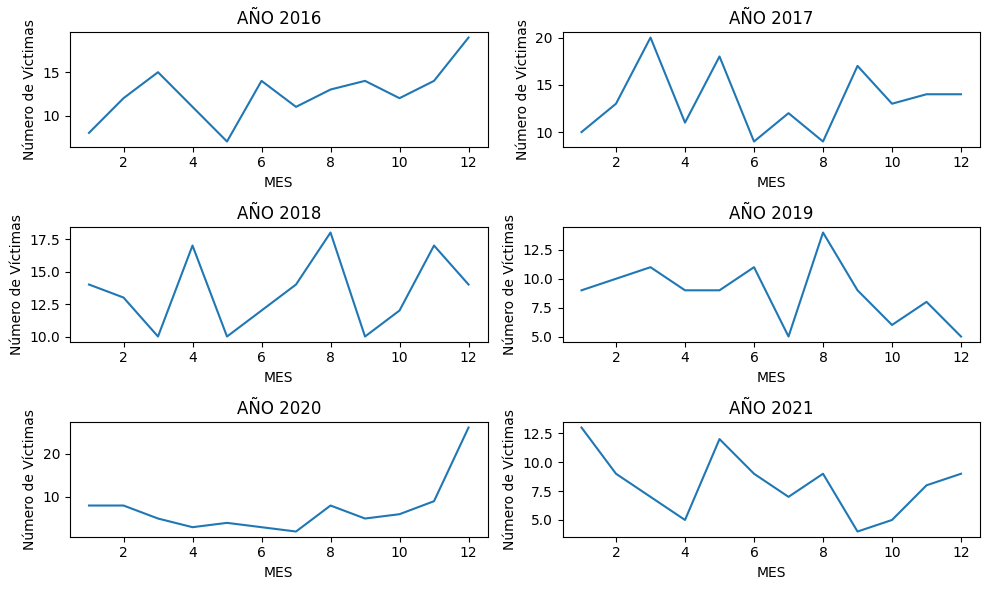

In [ ]:
victimas_mensual(df_homicidios)

Con la informacíon anterior, se observa que los picos de accidentes fatales no se repiten en los mismos meses de los distintos años, por lo cual no se observa ningún patrón en el comportamiento. Adicionalmente, producto de las medidas de cuarentena por la pandemia COVID-19, se observa con claridad la tendencia drástica a la baja de accidentes fatales desde Diciembre 2019 hasta Noviembre 2020.

Resumen mes:
El mes con menor cantidad de víctimas fatales tiene 51 víctimas
El mes con mayor cantidad de víctimas fatales tiene 87 víctimas
---------------------------------------------------------------
Resumen semana:
El día de la semana con menor cantidad de víctimas tiene 101 víctimas
El día de la semana con mayor cantidad de víctimas tiene 117 víctimas


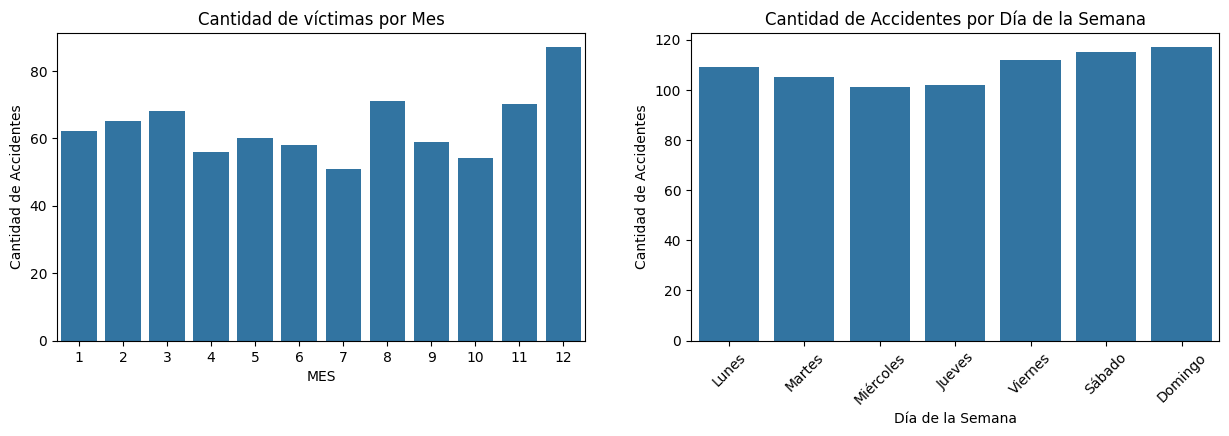

In [ ]:
# Distribución de hechos en meses y días.

# Se crea el gráfico.
plt.figure(figsize=(15, 4))

# Subplot 1:
# Se agrupa por la cantidad de víctimas por mes
victimas_mes = df_homicidios.groupby('MES').agg({'NUMERO_VICTIMAS':'sum'}).reset_index()

# Se gráfica usando gráfico de barras
plt.subplot(1, 2, 1)
ax = sns.barplot(x='MES', y='NUMERO_VICTIMAS', data=victimas_mes)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('MES') ; ax.set_ylabel('Cantidad de Accidentes')

# Se imprime resumen obtenido
print('Resumen mes:')
print(f'El mes con menor cantidad de víctimas fatales tiene {victimas_mes.min()[1]} víctimas')
print(f'El mes con mayor cantidad de víctimas fatales tiene {victimas_mes.max()[1]} víctimas')
print('-'*63)

# Subplot 2:

# Se convierte la columna 'fecha' a tipo de dato datetime
df_homicidios['FECHA'] = pd.to_datetime(df_homicidios['FECHA'])

# Se extrae el día de la semana (0 = lunes, 6 = domingo)
df_homicidios['DIA'] = df_homicidios['FECHA'].dt.dayofweek

# Se mapea el número del día de la semana a su nombre
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_homicidios['DIA'] = df_homicidios['DIA'].map(lambda x: dias_semana[x])

# Se cuenta la cantidad de accidentes por día de la semana
data = df_homicidios.groupby('DIA').agg({'NUMERO_VICTIMAS':'sum'}).reset_index()

# Se gráfica usando gráfico de barras
plt.subplot(1, 2, 2)
ax = sns.barplot(x='DIA', y='NUMERO_VICTIMAS', data=data, order=dias_semana)

ax.set_title('Cantidad de Accidentes por Día de la Semana') ; ax.set_xlabel('Día de la Semana') ; ax.set_ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)

# Se muestran datos resumen
print('Resumen semana:')
print(f'El día de la semana con menor cantidad de víctimas tiene {data.min()[1]} víctimas')
print(f'El día de la semana con mayor cantidad de víctimas tiene {data.max()[1]} víctimas')

# Se muestra el gráfico
plt.show()

Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que extiste a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Noviembre y Agosto. Los meses con menos cantidad de accidentes fatales registrados es Julio y Septiembre.

En cuanto al gráfico semanal y considerando el total de los registros, la distribución de los accidentes tienden a registrarse entre los viernes a lunes, con el máximo regritrado el día Domingo y el mínimo el día Jueves. Sin embargo, la diferencia entre las cantidades mínima y máxima registrada en la semana es del 11.5% solamente.

## Distribución por fines de semana vs días de la semana

Para tener en cuenta al momento de tomar medidas de control y seguridad, se compara la cantidad de accidentes en los días de semana  y los fines de semana.

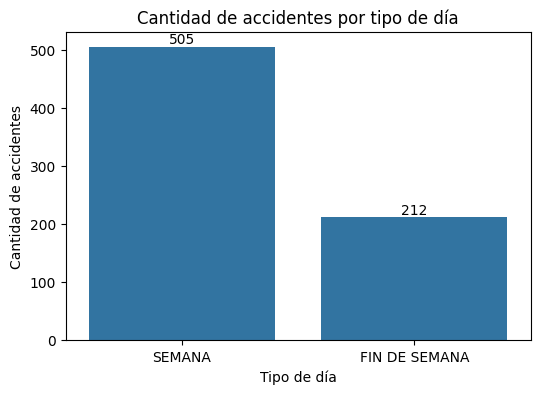

In [ ]:
df_semana = df_homicidios

# Se extrae el día de la semana (0 = lunes, 6 = domingo)
df_semana['DIA_SEMANA'] = df_semana['FECHA'].dt.dayofweek

# Se crea una columna 'tipo_dia' para diferenciar entre semana y fin de semana
df_semana['TIPO_DIA'] = df_semana['DIA_SEMANA'].apply(lambda x: 'FIN DE SEMANA' if x >= 5 else 'SEMANA')

# Se cuenta la cantidad de accidentes por tipo de día
data = df_semana['TIPO_DIA'].value_counts().reset_index()
data.columns = ['TIPO_DIA', 'CANTIDAD_ACCIDENTES']

# Se crea el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='TIPO_DIA', y='CANTIDAD_ACCIDENTES', data=data)

ax.set_title('Cantidad de accidentes por tipo de día') ; ax.set_xlabel('Tipo de día') ; ax.set_ylabel('Cantidad de accidentes')

# Se agrega las cantidades en las barras
for index, row in data.iterrows():
    ax.annotate(f'{row["CANTIDAD_ACCIDENTES"]}', (index, row["CANTIDAD_ACCIDENTES"]), ha='center', va='bottom')

# Se muestra el gráfico
plt.show()

El gráfico revela que la mayor cantidad de accidentes se concentra durante la semana, esta tendencia contrasta con el análisis anterior, donde se observaba una mayor concentración de accidentes entre viernes y lunes. No obstante, al analizar los datos de lunes a viernes como un solo bloque, se observa que la cantidad total de accidentes en días de semana supera significativamente la cifra del fin de semana por mas de la mitad.

## Distribución por momento del día

Se creó una nueva columna donde se caracterizaran los diferentes momentos del día con el siguiente criterio:

*   Mañana: de 6:00 a 11:59
*   Medio día: de 12:00 a 12:59
*   Tarde: de 13:00 a 18:59
* Noche: de 19:00 a 23:59
* Madrugada: de 24:00 a 05:59

In [ ]:
def momento_dia(hora):
  '''
  Devuelve la categoría de tiempo correspondiente a la hora proporcionada.

  Parametro:
    hora: La hora a clasificar.

  Retorna:
    La categoría de tiempo correspondiente.
  '''
  if hora.hour >= 6 and hora.hour <= 12:
    return 'MAÑANA'
  elif hora.hour >= 12 and hora.hour <= 13:
    return 'MEDIO DIA'
  elif hora.hour >= 14 and hora.hour <= 18:
    return 'TARDE'
  elif hora.hour >= 19 and hora.hour <= 23:
    return 'NOCHE'
  else:
    return 'MADRUGADA'

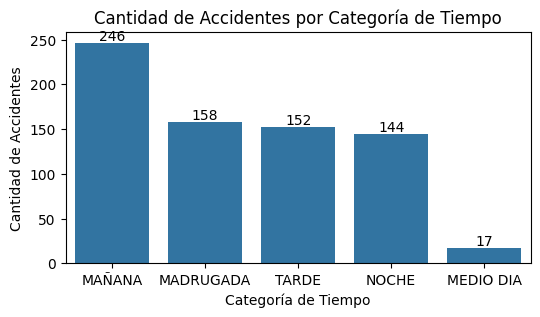

In [ ]:
df_tiempo = df_homicidios
# Se aplica la función momento_dia para crear la columna 'CATEGORIA_TIEMPO'
df_tiempo['CATEGORIA_TIEMPO'] = df_tiempo['HORA_COMPLETA'].apply(momento_dia)

# Se cuenta la cantidad de accidentes por categoría de tiempo
data = df_tiempo['CATEGORIA_TIEMPO'].value_counts().reset_index()
data.columns = ['CATEGORIA_TIEMPO', 'CANTIDAD_ACCIDENTES']

# Se calculan los porcentajes
total_accidentes = data['CANTIDAD_ACCIDENTES'].sum()
data['Porcentaje'] = (data['CANTIDAD_ACCIDENTES'] / total_accidentes) * 100

# Se crea el gráfico de barras
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='CATEGORIA_TIEMPO', y='CANTIDAD_ACCIDENTES', data=data)

ax.set_title('Cantidad de Accidentes por Categoría de Tiempo') ; ax.set_xlabel('Categoría de Tiempo') ; ax.set_ylabel('Cantidad de Accidentes')

# Se agrega las cantidades en las barras
for index, row in data.iterrows():
    ax.annotate(f'{row["CANTIDAD_ACCIDENTES"]}', (index, row["CANTIDAD_ACCIDENTES"]), ha='center', va='bottom')

# Se muestra el gráfico
plt.show()

Fácilmente se aprecia que la mayor cantidad de accidentes, que representan el 34.3%, ocurren en la mañana, donde la actividad laboral es alta. En el mediodía se registra drásticamente un porcentaje menor de cantidad de accidentes fatales respecto a los otros momentos del día.

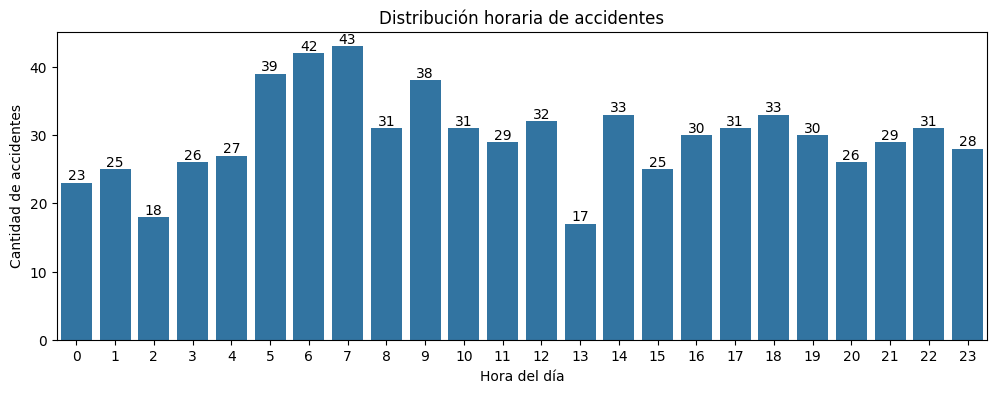

In [ ]:
df_tiempo = df_homicidios

# Se extrae la hora del día de la columna 'HORA_COMPLETA'
df_tiempo['HORA_DIA'] = df_tiempo['HORA_COMPLETA'].apply(lambda x: x.hour)

# Se cuenta la cantidad de accidentes por hora del día
data = df_tiempo['HORA_DIA'].value_counts().reset_index()
data.columns = ['HORA_DIA', 'Cantidad de accidentes']

# Se ordena los datos por hora del día
data = data.sort_values(by='HORA_DIA')

# Se crea el gráfico de barras
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='HORA_DIA', y='Cantidad de accidentes', data=data)

ax.set_title('Distribución horaria de accidentes') ; ax.set_xlabel('Hora del día') ; ax.set_ylabel('Cantidad de accidentes')

# Se agrega las cantidades en las barras
for index, row in data.iterrows():
    ax.annotate(f'{row["Cantidad de accidentes"]}', (row["HORA_DIA"], row["Cantidad de accidentes"]), ha='center', va='bottom')

# Se muestra el gráfico
plt.show()

Los accidentes tienen una distribución horaria notable, destacando el periodo de 5 a 8 de la mañana como el de mayor incidencia. Además, se observan picos adicionales alrededor de las 9 de la mañana, así como a las 14 horas, 18 horas y 22 horas.

## Sexo de las víctimas

En este apartado se intenta analizar la relación del sexo con las cantidades de accidente, los roles y el tipo de vehículo que ocupaba o si era peatón.



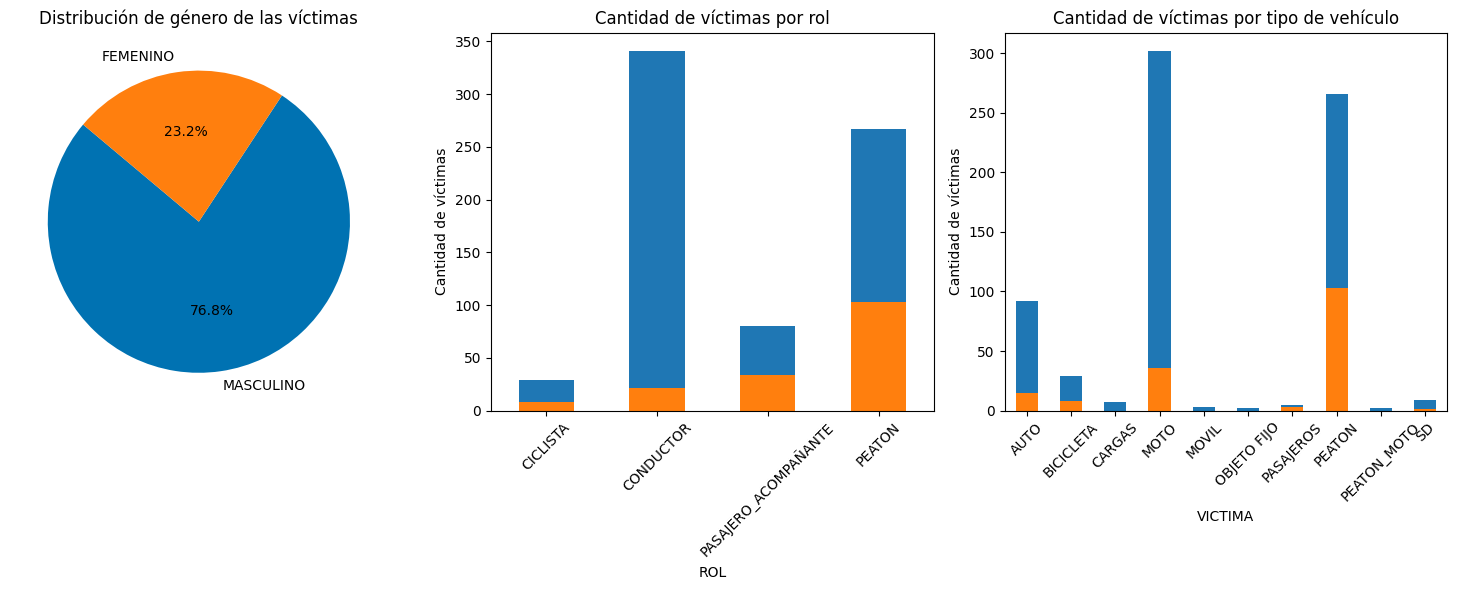

In [ ]:
# Definición de colores
colores_hombres = '#0072B2'
colores_mujeres = '#FF7F0E'
colores_por_defecto = sns.color_palette()
colores_invertidos = [colores_por_defecto[1], colores_por_defecto[0]]

# Creación de figura y subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Gráfico 1: Sexo (gráfico de torta)
conteo_sexo = df_homicidios['SEXO'].value_counts()
axes[0].pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=140, colors=[colores_hombres, colores_mujeres])
axes[0].set_title('Distribución de género de las víctimas')

# Gráfico 2: Rol
df_rol = df_homicidios.groupby(['ROL', 'SEXO']).size().unstack(fill_value=0)
df_rol.plot(kind='bar', stacked=True, ax=axes[1], color=colores_invertidos)
axes[1].set_title('Cantidad de víctimas por rol')
axes[1].set_ylabel('Cantidad de víctimas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)

# Gráfico 3: Tipo de vehículo
df_victima = df_homicidios.groupby(['VICTIMA', 'SEXO']).size().unstack(fill_value=0)
df_victima.plot(kind='bar', stacked=True, ax=axes[2], color=colores_invertidos)
axes[2].set_title('Cantidad de víctimas por tipo de vehículo')
axes[2].set_ylabel('Cantidad de víctimas')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend().set_visible(False)

# Se muestran los gráficos
plt.tight_layout()
plt.show()

Se observa una notable disparidad en la cantidad de víctimas masculinas en comparación con las femeninas. Esta diferencia se destaca especialmente en la categoría de 'CONDUCTOR', donde la mayoría de las víctimas son hombres. Resulta llamativo que los accidentes en motocicleta presenten una proporción significativa de víctimas masculinas, siendo este el tipo de vehículo con la mayor proporción de accidentes. Por otro lado, los peatones también son víctimas frecuentes en accidentes, con una cantidad considerable de fallecimientos, y aunque la diferencia de género es menos pronunciada, los hombres aún representan una proporción mayor en este grupo.

## Edad de las víctimas

En este punto, el objetivo es analizar el patrón de distribución de las edades de las víctimas. Se presentan dos tipos de gráficos para comprender esta distribución: un histograma y un diagrama de caja (boxplot).

El histograma muestra la frecuencia de las edades en forma de barras, permitiendo identificar los rangos de edades más comunes y evaluar la forma de la distribución. Por otro lado, el boxplot proporciona una visualización de la distribución de las edades mediante cuartiles, mediana, valores atípicos y rango intercuartil. Este gráfico es útil para detectar la presencia de valores extremos y comprender la dispersión de las edades.

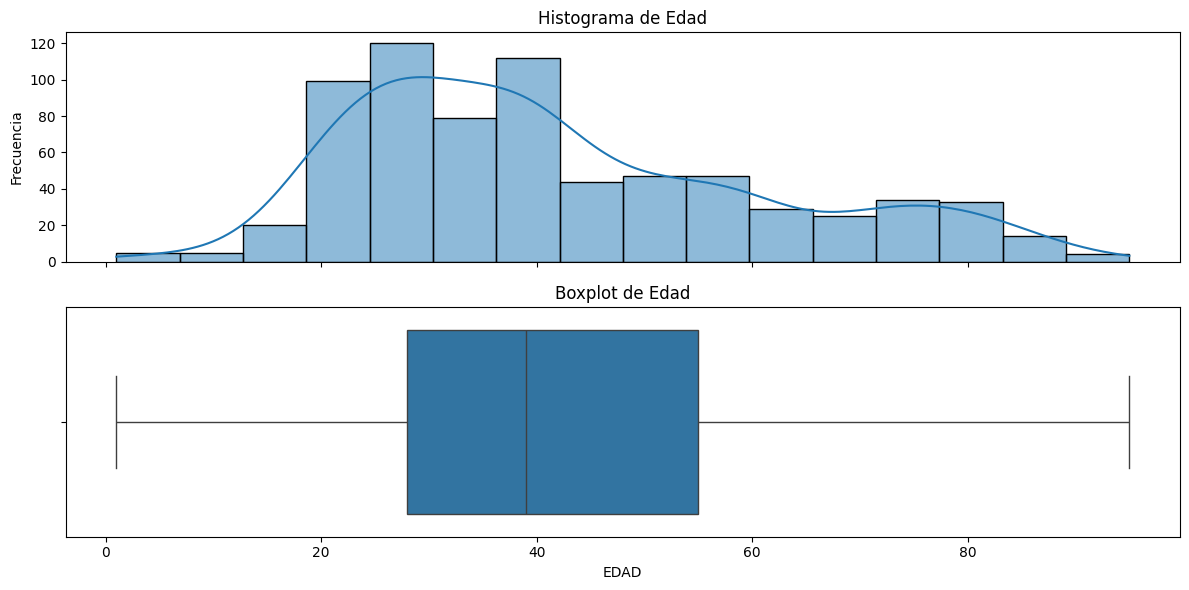

In [ ]:
# Se crea una figura con un solo eje x compartido
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(df_homicidios['EDAD'], kde=True, ax=ax[0])
ax[0].set_title('Histograma de Edad') ; ax[0].set_ylabel('Frecuencia')

# Se grafica el boxplot de la edad
sns.boxplot(x=df_homicidios['EDAD'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('EDAD')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()


Los gráficos revelan que la mayoría de las víctimas (75%) son menores de 55 años, con una edad promedio de 39 años. No se observan valores atípicos. Si bien se registran edades entre 1 y 95 años, esto se debe a la información de todas las víctimas, no solo de los conductores. El histograma muestra una distribución ligeramente sesgada a la derecha, con mayor concentración de accidentes entre los 20 y 40 años.

A continuación se analiza la relación de la edad con los distintos vehículos que ocupaba la victima o si era peatón.

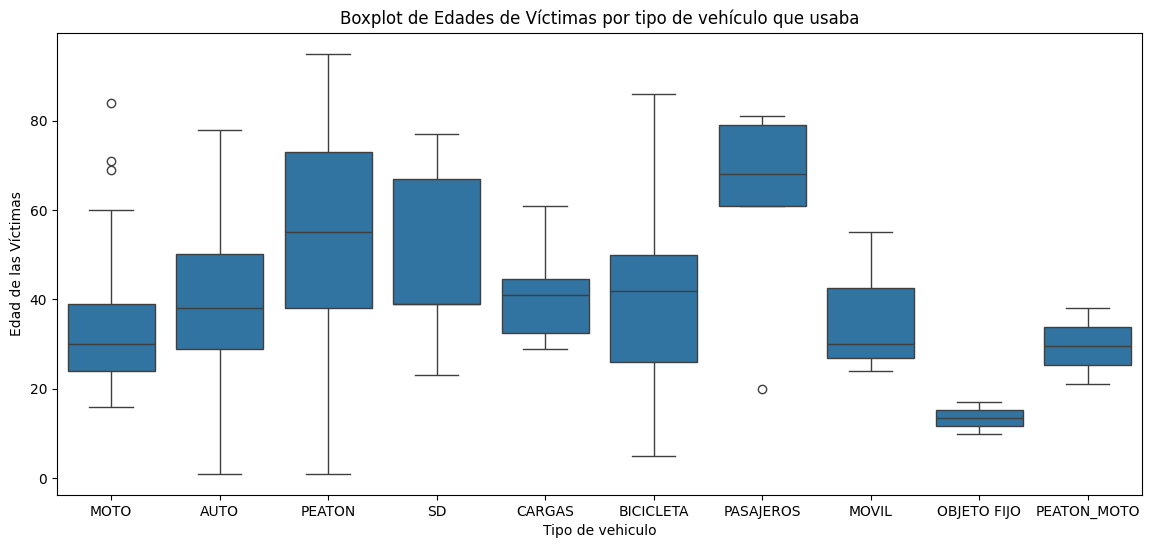

In [ ]:
# Se crea el gráfico de boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='VICTIMA', y='EDAD', data=df_homicidios)

plt.title('Boxplot de Edades de Víctimas por tipo de vehículo que usaba') ; plt.xlabel('Tipo de vehiculo') ; plt.ylabel('Edad de las Víctimas')

plt.show()

Se puede apreciar una amplia variabilidad en las edades de las víctimas fallecidas según el tipo de vehículo que ocupaban en el momento del incidente. Es en la categoría de peatones donde se observa el rango más amplio de edades en comparación con las demás categorías. Las víctimas de mayor edad tienden a concentrarse más en el rol de pasajeros, mientras que las víctimas más jóvenes se observan principalmente en motocicletas y otras categorías.

A continuación, analizaremos la distribución de edades por Rol.

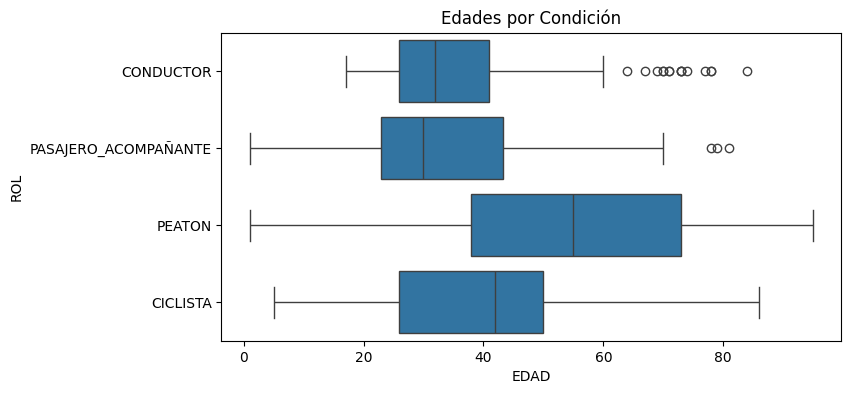

In [ ]:
# Se crea el gráfico de boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(y='ROL', x='EDAD', data=df_homicidios)
plt.title('Edades por Condición')
plt.show()

Se ha observado que la edad promedio de los conductores de automóviles y los pasajeros acompañantes es similar, alrededor de los 35 años. Sin embargo, se destaca que la edad mínima de los conductores es de aproximadamente 18 años, mientras que en los otros roles es posible encontrar víctimas de edades más jóvenes, lo que se se relaciona con ser niños que están siendo transportados.
En el caso de los peatones, se observa una mayor variabilidad en las edades, que van desde niños pequeños hasta adultos mayores de casi 90 años.

Aunque se presentan algunas edades atípicas en los conductores y pasajeros acompañantes, estas son esperables y se consideran  casos especiales dentro del conjunto de datos.

## Participantes en los accidentes


Se analizan las cantidades de víctimas en función de los vehículos o medios de transporte que participaron de hecho.

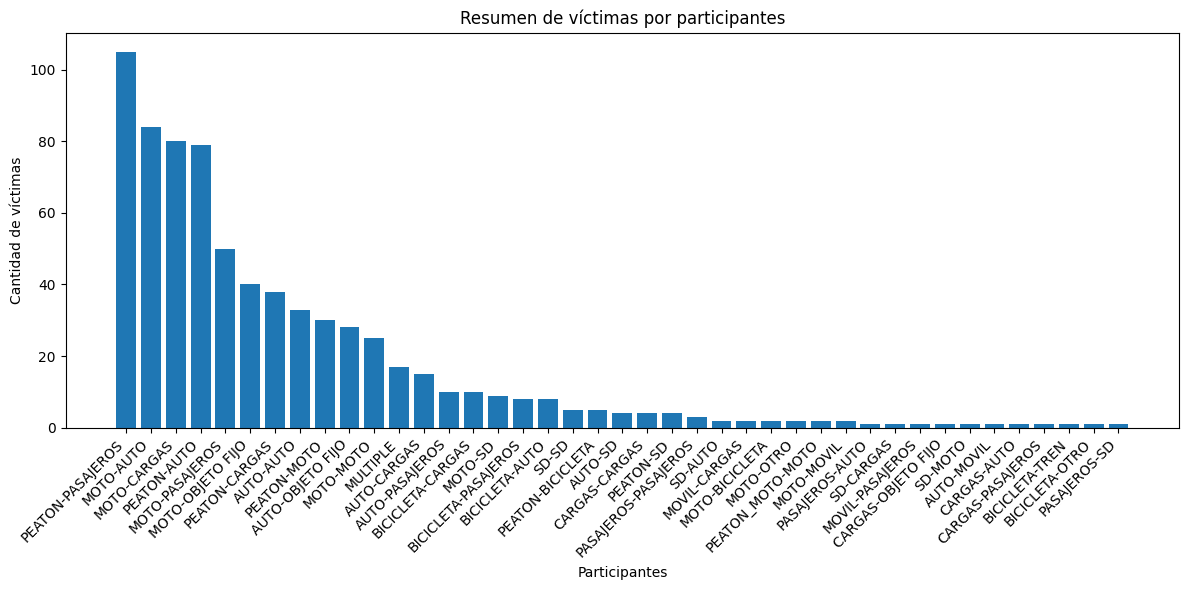

In [ ]:
df = df_homicidios

# Se calcula la cantidad de víctimas por participantes
participantes_counts = df['PARTICIPANTES'].value_counts().reset_index()
participantes_counts.columns = ['PARTICIPANTES', 'CANTIDAD_VICTIMAS']

# Se calcula el porcentaje de víctimas por participantes
total_victimas = participantes_counts['CANTIDAD_VICTIMAS'].sum()
participantes_counts['Porcentaje de víctimas'] = round((participantes_counts['CANTIDAD_VICTIMAS'] / total_victimas) * 100, 2)

# Se ordenan los datos por cantidad de víctimas en orden descendente
participantes_counts = participantes_counts.sort_values(by='CANTIDAD_VICTIMAS', ascending=False)

# Se crea el gráfico de barras con los nombres rotados
plt.figure(figsize=(12, 6))
ax = plt.bar(participantes_counts['PARTICIPANTES'], participantes_counts['CANTIDAD_VICTIMAS'])
plt.xlabel('Participantes')
plt.ylabel('Cantidad de víctimas')
plt.title('Resumen de víctimas por participantes')
plt.xticks(rotation=45, ha='right')

# Se muestra el gráfico
plt.tight_layout()
plt.show()

Se aprecia claramente que los hechos que involucran moto, auto y cargas son los que mayor cantidad de víctimas acumulan.

Es interesante notar que la mayoría de las víctimas se producen en casos donde están involucrados peatones y pasajeros. Según el diccionario de datos, Peatón es cualquier víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a y Pasajero es cualquier persona lesionada que se encuentran dentro, descendiendo o ascendiendo de unidades de transporte público de pasajeros y autobuses de larga distancia.

## Influencia de los Cruces

En este apartado lo que se busca en encontrar patrones en relación del tipo de calle donde ocurren los hechos y si son cruces de calles o no.



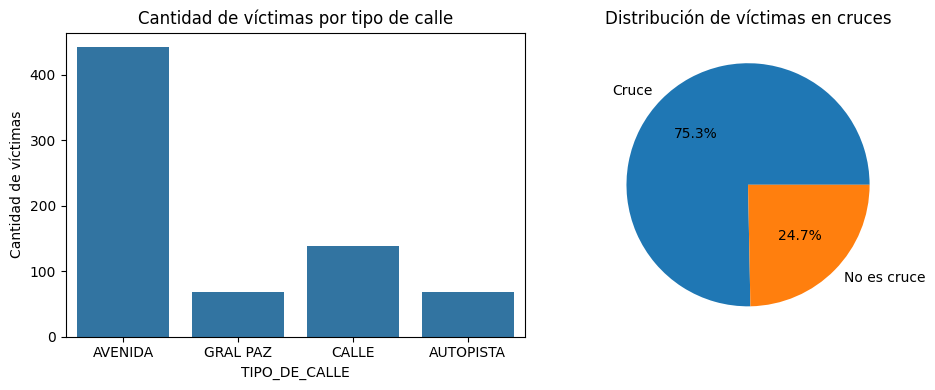

In [ ]:
# Se crea el gráfico
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico 1: Cantidad de víctimas por tipo de calle
sns.countplot(data=df, x='TIPO_DE_CALLE', ax=axes[0])
axes[0].set_title('Cantidad de víctimas por tipo de calle')
axes[0].set_ylabel('Cantidad de víctimas')

# Gráfico 2: Distribución de víctimas en cruces (gráfico de torta)
conteo_cruce = df['CRUCE'].value_counts()
labels = ['Cruce', 'No es cruce']
axes[1].pie(conteo_cruce, labels=labels, autopct='%1.1f%%')
axes[1].set_title('Distribución de víctimas en cruces')

# Mostramos los gráficos
plt.tight_layout()
plt.show()

Estos gráficos nos demuestran que la mayor cantidad de hechos con víctimas fatales ocurren en las avenidas y en particular en los cruces de calles.
Este es un detalle muy importante a tener en cuenta para tomar medidas preventivas en pro de disminuir los accidentes fatales.

# Carga del dataframe

In [ ]:
df_homicidios.head()

,ID,ROL,SEXO,EDAD,NUMERO_VICTIMAS,FECHA,AÑO,MES,DIA,HORA_COMPLETA,...,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA,TIPO_DIA,CATEGORIA_TIEMPO,HORA_DIA
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,Viernes,04:00:00,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,4,SEMANA,MADRUGADA,4
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,Sábado,01:15:00,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,5,FIN DE SEMANA,MADRUGADA,1
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,Domingo,07:00:00,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,6,FIN DE SEMANA,MAÑANA,7
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,Domingo,00:00:00,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,6,FIN DE SEMANA,MADRUGADA,0
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,Jueves,05:20:00,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,3,SEMANA,MADRUGADA,5


In [ ]:
archivo_limpio = './datos/siniestros_limpio.csv'
df_homicidios.to_csv(archivo_limpio, index=False, encoding='utf-8')
print(f'El archivo se ha guardado en {archivo_limpio} con formato CSV exitosamente.')

El archivo se ha guardado en /content/drive/MyDrive/PI2_Siniestros_Viales/datos/siniestros_limpio.csv con formato CSV exitosamente.
